<a href="https://colab.research.google.com/github/jaytrey777/Regression-Metrics/blob/main/Regression_Metrics_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment:

The ultimate goal of this task is to predict the price based on the available features using a linear regression model.

All of the features and the target are continuous variables.

For now, you do not need to do any cleaning of this data set. You can use it "as is."

An important exploration step is to determine if there are any moderate or strong correlations in your variables.

1. Make a heatmap of the correlations. Identify any features that have a correlation coefficient of magnitude 0.5 (could be + or -) or greater with price. Limit your analysis to these three features.

2. Select ONLY the 3 features most highly correlated with price for your feature matrix (X).  

3.  Select price for your target vector (y).

4. Split your data into train and test sets. Please use the random number 42 for consistency!

5. Instantiate your model and fit it on the training set.

6. Evaluate your model performance using R^2 on the training set and on the test set. Is there a difference between model performance on the training data vs the test data?

7. Evaluate your model on both data sets using mean absolute error (MAE).

8. Evaluate your model on both data sets using mean squared error (MSE).

9. Evaluate your model performance using RMSE on the training set and on the test set. This metric is useful because the units will be in the same units as your target vector, in this case, 1,000s of dollars.

#Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib as mpl

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn import set_config
set_config(display = 'diagram')

#Drive Mounting & Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

filename = '/content/drive/MyDrive/Colab Notebooks/02. Weeks 5-8: Machine Learning/06 Week 6: Regression/5. Core Assignments/Boston_Housing_from_Sklearn.csv'
df = pd.read_csv(filename)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Verify to see if data loaded properly.

In [ ]:
df.info() # checking information about the data to see if anything stands out right away. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
 6   PRICE    506 non-null    float64
dtypes: float64(7)
memory usage: 27.8 KB


# Make a heatmap of the correlations. Identify any features that have a correlation coefficient of magnitude 0.5 (could be + or -) or greater with price. Limit your analysis to these three features.

In [ ]:
corr = df.corr() #sets the dataframe to the variable corr
corr #prints the corr table 

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
CRIM,1.000000,0.420972,-0.219247,0.352734,0.289946,0.455621,-0.388305
NOX,0.420972,1.000000,-0.302188,0.731470,0.188933,0.590879,-0.427321
RM,-0.219247,-0.302188,1.000000,-0.240265,-0.355501,-0.613808,0.695360
AGE,0.352734,0.731470,-0.240265,1.000000,0.261515,0.602339,-0.376955
PTRATIO,0.289946,0.188933,-0.355501,0.261515,1.000000,0.374044,-0.507787
LSTAT,0.455621,0.590879,-0.613808,0.602339,0.374044,1.000000,-0.737663
PRICE,-0.388305,-0.427321,0.695360,-0.376955,-0.507787,-0.737663,1.000000


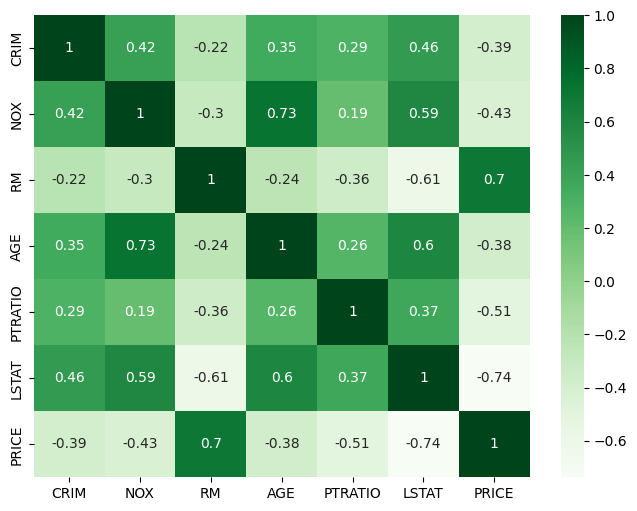

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6)) #sets the figure size
ax = sns.heatmap(corr, cmap= 'Greens', annot = True) #prints the heatmap using the figure size from the previous line. Makes the plot green and writes the values in the squares.

The `three features` that have a `correlation above 0.5 or less than -0.5` in relation to `price` are  `RM`, `PT RATIO` and `LSTAT`.  We will look at those features for our model. 

# Select ONLY the 3 features most highly correlated with price for your feature matrix (X).  


In [ ]:
X = df[['RM', 'PTRATIO', 'LSTAT']].copy() # makes a copy of the filtered data and stores it to our feature matrix
X.head()

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33


# Select price for your target vector (y).


In [ ]:
y = df['PRICE'].copy() # sets the target vector y to the price
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64


# Split your data into train and test sets. Please use the random number 42 for consistency!

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42) #splits the training and testing data

# Instantiate your model and fit it on the training set.

- All of our data is numerical so we will use the median values for any missing data. 

In [ ]:
#instantiate scaler and model
regression = LinearRegression() 
scaler = StandardScaler()

regression_pipeline = make_pipeline(scaler, regression) # pipeline for regression line

regression_pipeline.fit(X_train, y_train) #Fit pipeline to training data

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
training_predictor = regression_pipeline.predict(X_train)
testing_predictor = regression_pipeline.predict(X_test)

# Evaluate your model performance using R^2 on the training set and on the test set. Is there a difference between model performance on the training data vs the test data?

In [ ]:
# Calculating R^2
print(f'Training Data R-Squared: {round(regression_pipeline.score(X_train, y_train),3)}')
print(f'Testing Data R-Squared: {round(regression_pipeline.score(X_test, y_test),3)}')

Training Data R-Squared: 0.688
Testing Data R-Squared: 0.633


# Evaluate your model on both data sets using mean absolute error (MAE).


In [ ]:
#Calculating Mean Absolute Error
training_MAE = mean_absolute_error(y_train, training_predictor)
testing_MAE = mean_absolute_error(y_test, testing_predictor)

print(f'Training Data MAE: {round(training_MAE, 3)}')
print(f'Testing Data MAE: {round(testing_MAE, 3)}')

Training Data MAE: 3.714
Testing Data MAE: 3.392


# Evaluate your model on both data sets using mean squared error (MSE).

In [ ]:
#Calculating Mean Squared Error
training_MSE = mean_squared_error(y_train, training_predictor)
testing_MSE = mean_squared_error(y_test, testing_predictor)

print(f'Training Data MSE: {round(training_MSE, 3)}')
print(f'Testing Data MSE: {round(testing_MSE, 3)}')

Training Data MSE: 27.687
Testing Data MSE: 25.689


# Evaluate your model performance using RMSE on the training set and on the test set. This metric is useful because the units will be in the same units as your target vector, in this case, 1,000s of dollars

In [ ]:
#Calculating Root Mean Squared Error
training_RMSE = np.sqrt(training_MSE)
testing_RMSE = np.sqrt(testing_MSE)

print(f'Training Data RMSE: {round(training_RMSE, 3)}')
print(f'Testing Data RMSE: {round(testing_RMSE, 3)}')

Training Data RMSE: 5.262
Testing Data RMSE: 5.068
